In [63]:
import pandas as pd
import seaborn as sns
from calendar import month_name
%run Untitled22.ipynb
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


loading the rainfall dataset and transforming it


In [92]:
rain = pd.read_csv('Documents/python code unibo/data/rain_data.csv', index_col='Unnamed: 0')
rain.head()

#creating avariable which will return the precipitation in mm

rain['precipitation in mm'] = rain[0:-1].sum(axis=1)
# Converting the datatframe into time series
rain.index = pd.to_datetime(rain.index)

#converting into monthly time serie
cols = [-1]
rain2 = rain[rain.columns[cols]]
rain_montly =rain2.resample('M').mean()
months = [month_name[i] for i in range(3,13)]
rain_montly['months'] = months
rain_montly = rain_montly.drop(rain_montly.index[-1])

In [67]:
rain.index = pd.to_datetime(rain.index)
df.index = pd.to_datetime(df.index).date.astype('datetime64')
#tweets = df2['class'].truncate(before='2022-03-29')

#target_date = pd.Timestamp('2022-03-29')

tweets_weekly = df2.resample('W').sum()
tweets_weekly = tweets_weekly.rename(columns={"class": "malaria instances"})
tweets_weekly["months"] = tweets_weekly.index.month
tweets_weekly["months"] = [month_name[num] for num in tweets_weekly["months"]]



rain_weekly = rain.resample('W').mean()
rain_weekly["months"] = rain_weekly.index.month
rain_weekly["months"] = [month_name[num] for num in rain_weekly["months"]]
rain_weekly1 = rain_weekly[rain_weekly.columns[cols]]
    
    

In [68]:
rain_weekly1.head()

,precipitation in mm,months
2022-03-20,4.483333,March
2022-03-27,4.857143,March
2022-04-03,5.071429,April
2022-04-10,14.585714,April
2022-04-17,30.671429,April


In [74]:
rain_week_1week = rain_weekly1.copy()
rain_week_1week.index = rain_weekly1.index.shift(periods=-1)# Shift the dates backward by two weeks
#df = df[df['date'] >= target_date]
#df['date'] = df['date'].dt.strftime('%d-%m-%Y')
#tweets_weekly.index = tweets_weekly.index.strftime('%d-%m-%Y')

#tweets_weekly = tweets_weekly[tweets_weekly.index>=target_date]


rain_week_2week = rain_weekly1.copy()
rain_week_2week.index = rain_weekly1.index.shift(periods=-2) # Shift the dates backward by one week
rain_week_1week

,precipitation in mm,months
2022-03-13,4.483333,March
2022-03-20,4.857143,March
2022-03-27,5.071429,April
2022-04-03,14.585714,April
2022-04-10,30.671429,April
2022-04-17,27.157143,April
2022-04-24,13.657143,May
2022-05-01,31.957143,May
2022-05-08,32.471429,May
2022-05-15,29.314286,May


# The precipitation graph

<AxesSubplot:xlabel='months', ylabel='precipitation in mm'>

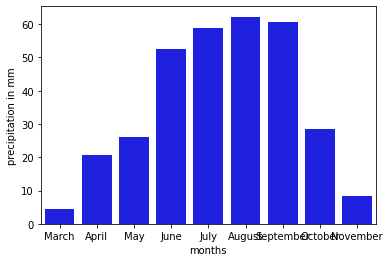

In [96]:
# Create the bar plot
sns.barplot(x='months', y='precipitation in mm', data=rain_montly, color= "blue")


# tranformming the tweets dataset

In [70]:
# importing the dataset
df = pd.read_csv('Documents/data/tweet_df_class.csv', index_col='Datetime').drop('Unnamed: 0', axis=1)
tweets_text = df.original_text
prep_tweets = tweets_text.apply(pre_processing)

In [71]:
#converting the dataframe into a time series with only variables class and daytime 
cols = [1]
df2 = df[df.columns[cols]]


# Converting the datatframe into time series
df2.index = pd.to_datetime(df2.index)

monthly_ts = df2.resample('M').sum()
months = [month_name[i] for i in range(3,12)]
monthly_ts['months'] = months
monthly_ts = monthly_ts.rename(columns={"class": "malaria instances"})


# graph for the tweets

[Text(0.5, 0, 'months'),
 Text(0, 0.5, 'malaria instances'),
 Text(0.5, 1.0, 'malaria instances by months ')]

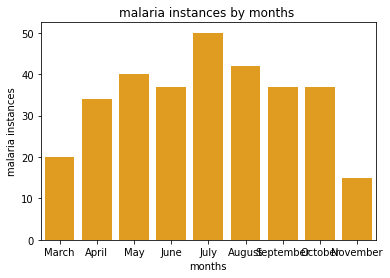

In [97]:
# the graph for the tweets
ax = sns.barplot(x='months', y='malaria instances', data=monthly_ts, color= "orange")
ax.set(xlabel='months', ylabel='malaria instances', title = "malaria instances by months ")

In [93]:
full = rain_montly.merge(monthly_ts, how='inner')
full1 = pd.melt(full, id_vars = "months")
full1



,months,variable,value
0,March,precipitation in mm,4.317647
1,April,precipitation in mm,20.733333
2,May,precipitation in mm,26.135484
3,June,precipitation in mm,52.506667
4,July,precipitation in mm,58.954839
5,August,precipitation in mm,62.245161
6,September,precipitation in mm,60.786667
7,October,precipitation in mm,28.503226
8,November,precipitation in mm,8.396667
9,March,malaria instances,20.000000


In [91]:
rain_montly

,zaria,precipitation in mm,months
2022-03-31,0.000000,4.317647,March
2022-04-30,0.296667,20.733333,April
2022-05-31,0.816129,26.135484,May
2022-06-30,1.840000,52.506667,June
2022-07-31,2.019355,58.954839,July
2022-08-31,4.270968,62.245161,August
2022-09-30,3.200000,60.786667,September
2022-10-31,0.667742,28.503226,October
2022-11-30,0.000000,8.396667,November


In [23]:
rain_week_1week

DatetimeIndex(['2022-03-13', '2022-03-20', '2022-03-27', '2022-04-03',
               '2022-04-10', '2022-04-17', '2022-04-24', '2022-05-01',
               '2022-05-08', '2022-05-15', '2022-05-22', '2022-05-29',
               '2022-06-05', '2022-06-12', '2022-06-19', '2022-06-26',
               '2022-07-03', '2022-07-10', '2022-07-17', '2022-07-24',
               '2022-07-31', '2022-08-07', '2022-08-14', '2022-08-21',
               '2022-08-28', '2022-09-04', '2022-09-11', '2022-09-18',
               '2022-09-25', '2022-10-02', '2022-10-09', '2022-10-16',
               '2022-10-23', '2022-10-30', '2022-11-06', '2022-11-13',
               '2022-11-20', '2022-11-27', '2022-12-04', '2022-12-11'],
              dtype='datetime64[ns]', freq='W-SUN')

# The line graph

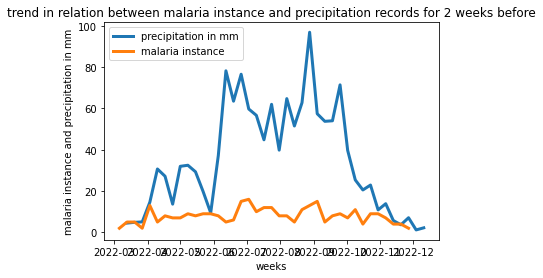

In [98]:
fig, axs = plt.subplots(ncols=1)
sns.lineplot(x=rain_week_1week.index, y='precipitation in mm', data=rain_week_1week,lw=3)
b = sns.lineplot(x=tweets_weekly.index, y='malaria instances', data=tweets_weekly, lw=3)
b.set(xlabel='weeks', ylabel='malaria instance and precipitation in mm', title = "trend in relation between malaria instance and precipitation records for 1 weeks before")
plt.legend(labels=['precipitation in mm','malaria instance'], facecolor='white')

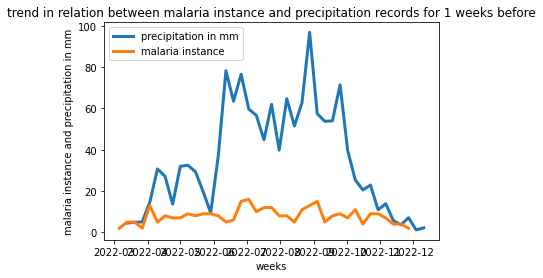

In [99]:
fig, axs = plt.subplots(ncols=1)
sns.lineplot(x=rain_week_1week.index, y='precipitation in mm', data=rain_week_2week,lw=3)
b = sns.lineplot(x=tweets_weekly.index, y='malaria instances', data=tweets_weekly, lw=3)
b.set(xlabel='weeks', ylabel='malaria instance and precipitation in mm', title = "trend in relation between malaria instance and precipitation records for 2 weeks before")
plt.legend(labels=['precipitation in mm','malaria instance'], facecolor='white')

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


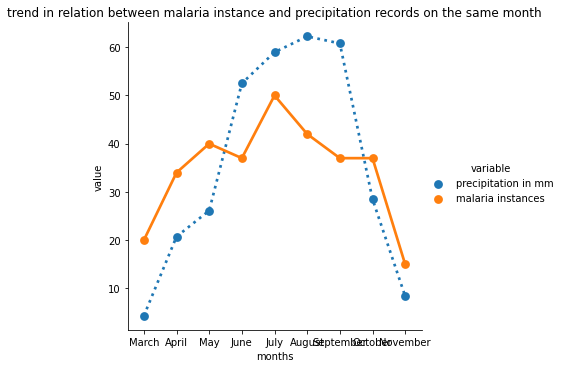

In [94]:
e = sns.factorplot(x = 'months', y='value', 
               hue = 'variable',data=full1, linestyles=[":", "-"])
e.set(title = "trend in relation between malaria instance and precipitation records on the same month")
plt.show()

# The bar graph

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


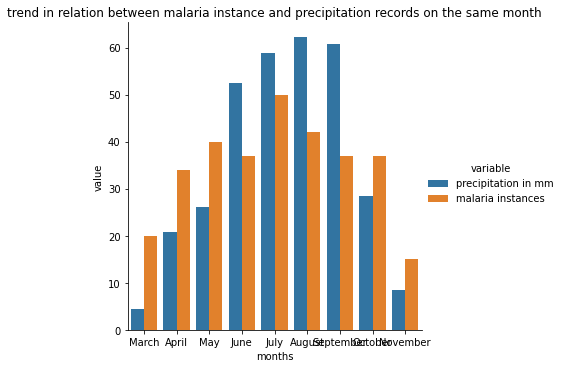

In [95]:
t =sns.factorplot(x = 'months', y='value', 
               hue = 'variable',data=full1, kind='bar')
t.set(title = "trend in relation between malaria instance and precipitation records on the same month")
plt.show()